In [123]:
import numpy as np
import pandas as pd
import StrategyLearner as sl
import Market as mc
import util
import datetime as dt

In [124]:
def compareTwoStrategy (strategy_orders, bm_orders):


    # call marketsimcode.py to compute portvalue
    strategy_port = mc.compute_portvals(strategy_orders,start_date,end_date, sv, com, imp)
    bm_port = mc.compute_portvals(bm_orders, start_date, end_date, sv, com, imp)

    # print bm_port
    print(strategy_port/sv)
    # plot portvale for benchmark and symbol stock
    plotStrategy(strategy_port, bm_port, sv, True )


# getOrders function changes trades dataframe to orders dataframe, so orders can be passed to marketsimcode to compute portvaule
# trades: A data frame whose values represent trades for each day.
# symbol: the stock symbol
def getOrders (trades, symbol):
    order_list = []
    for day in trades.index:
        if trades.loc[day, symbol] > 0:
            order_list.append([day.date(), symbol, 'BUY', trades.loc[day, symbol]])
        elif trades.loc[day, symbol] < 0:
            order_list.append([day.date(), symbol, 'SELL', trades.loc[day, symbol]])

    orders = pd.DataFrame.from_records(
        order_list,
        columns=['Date', 'Symbol', 'Order', 'Shares'])
    
    

    # orders dataframe only show the order on the days it trades
    return orders

# plotStrategy take portvalue of strategyLearner and benchmark
# and plot the the performance of the benchmark versus strategy in sample.
# port_st: portvalue of strategyLearner
# port_bm: portvalue of benchmark
def plotStrategy(port_st, port_bm, sv, gen_plot):
    if gen_plot:
    # add code to plot here

        df_temp = pd.concat([port_st/sv, port_bm/sv], keys=['Strategy', 'benchmark'], axis=1)
        util.plot_data(df_temp, title = "Performance of Strategy and Benchmark", xlabel= "Date", ylabel="Normalized price")

In [125]:
if __name__=="__main__":
    start_date = dt.datetime(2010, 1, 1)
    end_date = dt.datetime(2011, 12, 31)
    sv =100000
    symbol = 'AAPL'
    com = 0
    imp = 0

In [126]:
# initialize a strategylearner and generate trade
learner = sl.StrategyLearner(verbose=True, impact=imp)  # constructor
sd=dt.datetime(2008,1,1)
ed=dt.datetime(2009,12,31)
learner.addEvidence(symbol, sd,ed, sv)  # training phase
strategy_trades = learner.testPolicy(symbol,start_date, end_date, sv)

# generate benchmark trade
dates = pd.date_range(start_date, end_date)
prices_all = util.get_data([symbol], dates)  # automatically adds SPY
bm_trades = prices_all[[symbol, ]]
bm_trades.values[:, :] = 0
bm_trades.values[0, :] = 1000
bm_trades.values[-1, :] = -1000

strategy_orders = getOrders(strategy_trades, symbol)
bm_orders = getOrders(bm_trades, symbol)

                 Sum
Date                
2010-01-04    1.0000
2010-01-05    1.0000
2010-01-06    1.0000
2010-01-07    1.0000
2010-01-08    1.0000
...              ...
2011-12-23  300.0862
2011-12-27  310.9618
2011-12-28  297.6877
2011-12-29  306.1598
2011-12-30  305.7482

[504 rows x 1 columns]


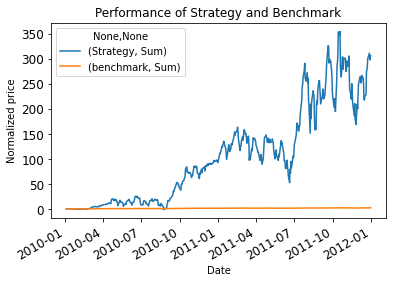

In [127]:
compareTwoStrategy(strategy_orders, bm_orders)